In [6]:
# Provided data
total_policies = 6480
total_claims = 9720
claims_per_policy = {
    0: 1282,
    1: 2218,
    2: 1856,
    3: 801,
    4: 235,
    5: 81,
    6: 7
}

In [7]:
# Calculate mean claims per policy
mean_claims_per_policy = total_claims / total_policies
mean_claims_per_policy

1.5

In [8]:
# Convert keys to integers
claims_per_policy = {int(key): value for key, value in claims_per_policy.items()}

# Calculate median claims per policy
sorted_claims = sorted(claims_per_policy.items())
claims_accumulated = 0
median_index = total_policies // 2
median_claims_per_policy = 0
for num_claims, num_policies in sorted_claims:
    claims_accumulated += num_policies
    if claims_accumulated >= median_index:
        median_claims_per_policy = num_claims
        break

In [9]:
# Calculate median claims per policy
sorted_claims = sorted(claims_per_policy.items())
claims_accumulated = 0
total_policies = sum(claims_per_policy.values())
median_index = total_policies // 2

for claims, policies in sorted_claims:
    claims_accumulated += policies
    if claims_accumulated >= median_index:
        median_claims = claims
        break

In [10]:
print("Median claims per policy:", median_claims)

Median claims per policy: 1


## Hierarchical Clustering Example

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


In [14]:

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(X)


In [16]:

# Plot dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)


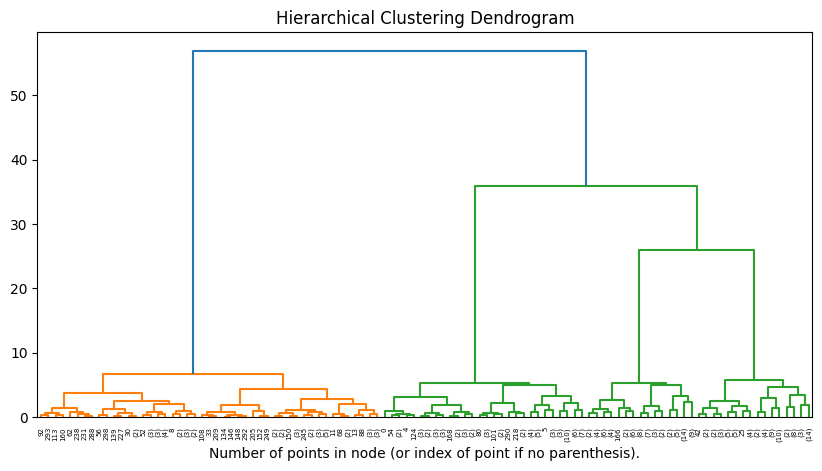

In [17]:

plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(cluster, truncate_mode='level', p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
